In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

%matplotlib inline

In [6]:
df_rough=pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col=False)
column_contain=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']


In [7]:
df=pd.DataFrame(data=df_rough,columns=column_contain)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [10]:
df.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:

df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


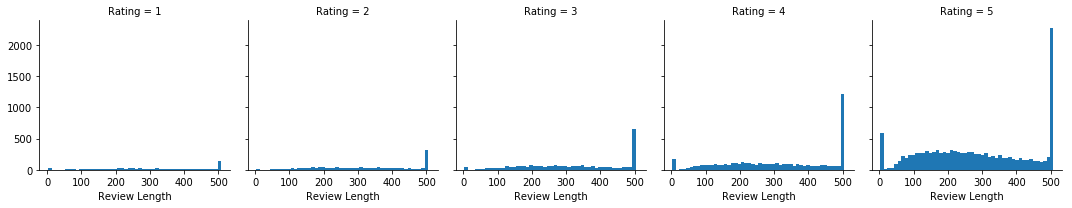

In [11]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

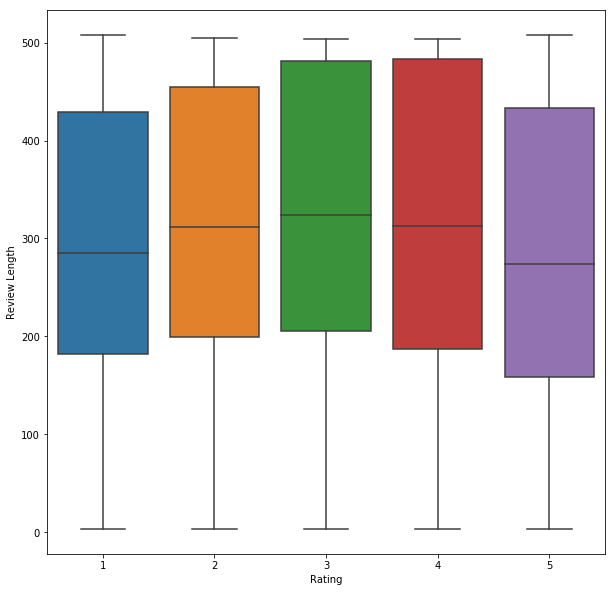

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=df)

In [13]:
rating = df.groupby('Rating').mean()
rating.corr()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,-0.977686,-0.303355,0.378828,0.975037
Age,-0.977686,1.000000,0.115681,-0.194958,-0.930949
Recommended IND,-0.303355,0.115681,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.378828,-0.194958,-0.987748,1.000000,0.384312
Review Length,0.975037,-0.930949,-0.307808,0.384312,1.000000


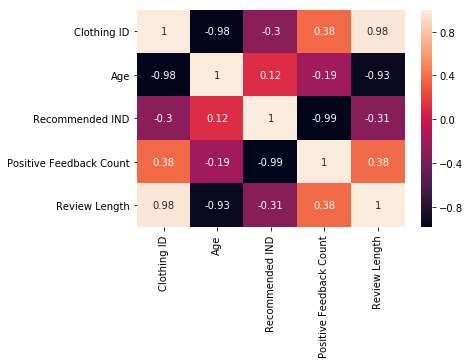

In [15]:
sns.heatmap(rating.corr(), annot= True)

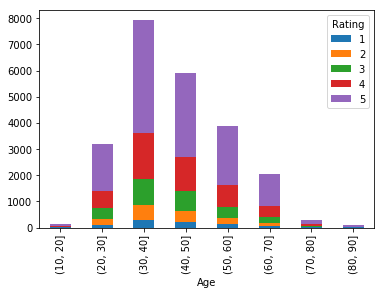

In [16]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

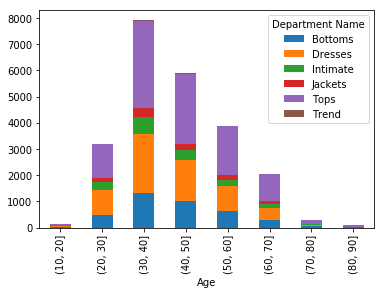

In [17]:
plt.figure(figsize=(15,15))
df.groupby(['Department Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)


Text(0.5,1,'Counts Vs Department Name')

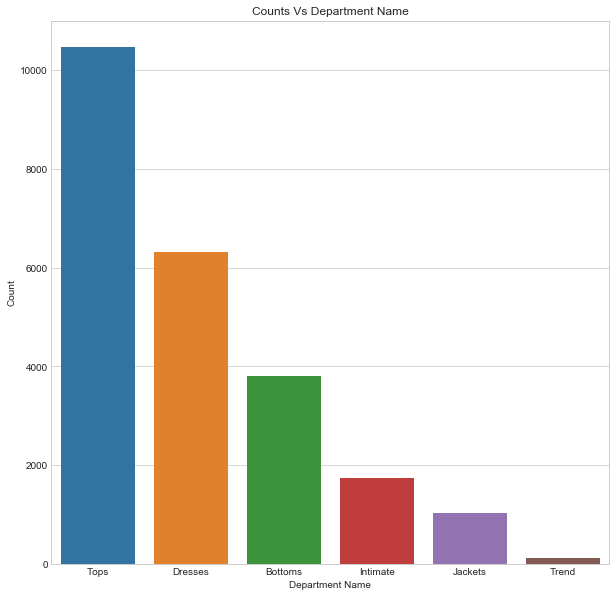

In [18]:
z=df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")

In [26]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [30]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [31]:

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [32]:
print(len(bow_transformer.vocabulary_))

13953


In [40]:
X_review = bow_transformer.transform(X_review)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
predict=nb.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  65  149]
 [  11 3240]]


             precision    recall  f1-score   support

          1       0.86      0.30      0.45       214
          5       0.96      1.00      0.98      3251

avg / total       0.95      0.95      0.94      3465



In [65]:
rating_positive=df['Review Text'][16]
rating_positive

"Material and color is nice.  the leg opening is very large.  i am 5'1 (100#) and the length hits me right above my ankle.  with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look.  if you are at least average height or taller, this may look good on you."

In [66]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

5

In [54]:
rating_negative=df['Review Text'][61]
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [55]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1

In [67]:
X_predict_recommend=df['Review Text']
y_recommend=df['Recommended IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)


print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 603  454]
 [ 242 4600]]


             precision    recall  f1-score   support

          0       0.71      0.57      0.63      1057
          1       0.91      0.95      0.93      4842

avg / total       0.87      0.88      0.88      5899



In [68]:
rating_positive


"Material and color is nice.  the leg opening is very large.  i am 5'1 (100#) and the length hits me right above my ankle.  with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look.  if you are at least average height or taller, this may look good on you."

In [69]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

1

In [70]:
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [71]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

0